# Analisis con Naive Bayes

In [75]:
# Importar librerias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [76]:
# Leer la data
dataframe = pd.read_csv("data_final_parte2.csv")

In [77]:
dataframe['diferenciaEdad']

0             poca
1         moderada
2         moderada
3             alta
4             poca
            ...   
394650    moderada
394651        alta
394652    moderada
394653        poca
394654    moderada
Name: diferenciaEdad, Length: 394655, dtype: object

## Un pequeño analisis adicional para complementar naive bayes

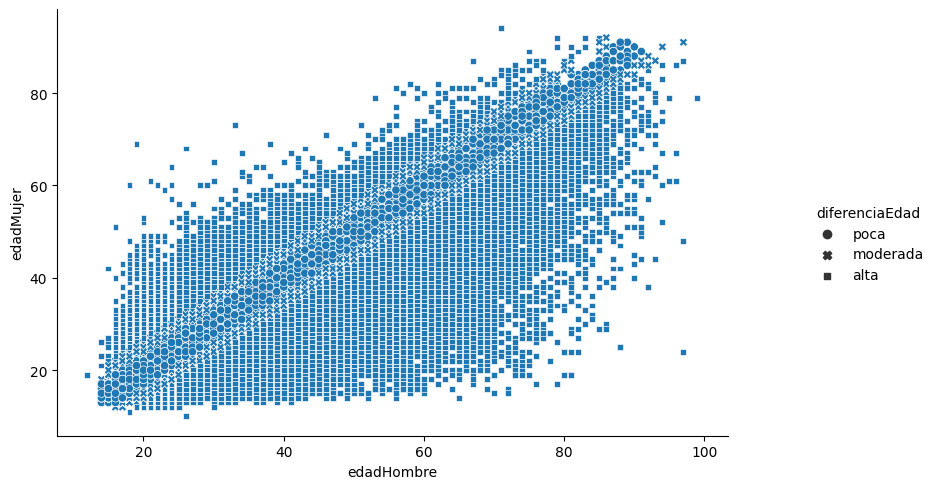

In [78]:
temp = sns.relplot(x='edadHombre', y='edadMujer', data=dataframe, style='diferenciaEdad')
temp.fig.set_size_inches(10,5)
plt.show()

Se puede observar que suele existir mucha variedad entre la diferencia de edad de las parejas que contraen matrimonios.

In [79]:
dataframe['diferenciaEdad'].value_counts()

poca        209196
moderada     97825
alta         87634
Name: diferenciaEdad, dtype: int64

In [80]:
age_diference = {"poca":1, "moderada":2, "alta":3}
dataframe['diferenciaEdad'] = dataframe['diferenciaEdad'].apply(lambda x: age_diference.get(x, 0))

In [81]:
dataframe['diferenciaEdad'].value_counts()

1    209196
2     97825
3     87634
Name: diferenciaEdad, dtype: int64

In [82]:
DiferenciaEdad = dataframe.pop('diferenciaEdad')

In [83]:
dataframe

,ocupacionHombre,ocupacionMujer,claseUnion,grupoEtnicoHombre,grupoEtnicoMujer,edadHombre,edadMujer,educacionHombre,educacionMujer,departamentoRegistro,mesRegistro,anioRegistro
0,9,9,3,-1,-1,29,31,1,1,7,1,2012
1,2,-1,1,2,-1,21,17,-1,1,21,12,2011
2,13,5,3,-1,-1,58,53,1,1,7,11,2011
3,5,5,1,1,1,31,24,5,4,7,11,2011
4,6,5,1,1,1,27,25,4,4,18,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
394650,10,14,1,2,2,32,26,4,2,8,4,2016
394651,1,14,1,2,2,23,31,-1,1,8,3,2016
394652,1,14,1,2,2,27,31,-1,2,8,4,2016
394653,1,14,1,2,2,34,34,1,1,8,4,2016


In [84]:
dataframe.corr()

,ocupacionHombre,ocupacionMujer,claseUnion,grupoEtnicoHombre,grupoEtnicoMujer,edadHombre,edadMujer,educacionHombre,educacionMujer,departamentoRegistro,mesRegistro,anioRegistro
ocupacionHombre,1.000000,0.328650,0.102313,-0.014044,-0.035478,-0.084513,-0.069435,0.412918,0.298729,0.005259,0.009760,0.307405
ocupacionMujer,0.328650,1.000000,0.061484,0.108437,0.122279,0.025883,0.032574,0.156975,0.173027,0.004807,0.005126,0.720852
claseUnion,0.102313,0.061484,1.000000,-0.088044,-0.071755,0.029806,0.039250,0.081276,0.096790,-0.013190,0.012312,0.098184
grupoEtnicoHombre,-0.014044,0.108437,-0.088044,1.000000,0.469297,-0.046619,-0.058316,0.130112,-0.044338,0.011370,0.004617,0.113555
grupoEtnicoMujer,-0.035478,0.122279,-0.071755,0.469297,1.000000,0.038221,0.069139,-0.004815,0.193708,0.007693,0.001462,0.074062
edadHombre,-0.084513,0.025883,0.029806,-0.046619,0.038221,1.000000,0.858542,-0.114826,-0.057205,-0.014429,0.010915,0.015612
edadMujer,-0.069435,0.032574,0.039250,-0.058316,0.069139,0.858542,1.000000,-0.109697,0.003119,-0.008103,0.013354,0.018935
educacionHombre,0.412918,0.156975,0.081276,0.130112,-0.004815,-0.114826,-0.109697,1.000000,0.467958,-0.030727,0.018477,0.202276
educacionMujer,0.298729,0.173027,0.096790,-0.044338,0.193708,-0.057205,0.003119,0.467958,1.000000,-0.023805,0.018107,0.159873
departamentoRegistro,0.005259,0.004807,-0.013190,0.011370,0.007693,-0.014429,-0.008103,-0.030727,-0.023805,1.000000,0.000783,-0.009188


## Empezar a llevar a cabo el modelo de Naive Bayes

In [85]:
y = DiferenciaEdad # Variable respuesta
X = dataframe # El resto de los datos
random.seed(1234)

In [86]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.4,train_size=0.6)

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236793 entries, 287657 to 240990
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ocupacionHombre       236793 non-null  int64
 1   ocupacionMujer        236793 non-null  int64
 2   claseUnion            236793 non-null  int64
 3   grupoEtnicoHombre     236793 non-null  int64
 4   grupoEtnicoMujer      236793 non-null  int64
 5   edadHombre            236793 non-null  int64
 6   edadMujer             236793 non-null  int64
 7   educacionHombre       236793 non-null  int64
 8   educacionMujer        236793 non-null  int64
 9   departamentoRegistro  236793 non-null  int64
 10  mesRegistro           236793 non-null  int64
 11  anioRegistro          236793 non-null  int64
dtypes: int64(12)
memory usage: 23.5 MB


In [88]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157862 entries, 25387 to 2694
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ocupacionHombre       157862 non-null  int64
 1   ocupacionMujer        157862 non-null  int64
 2   claseUnion            157862 non-null  int64
 3   grupoEtnicoHombre     157862 non-null  int64
 4   grupoEtnicoMujer      157862 non-null  int64
 5   edadHombre            157862 non-null  int64
 6   edadMujer             157862 non-null  int64
 7   educacionHombre       157862 non-null  int64
 8   educacionMujer        157862 non-null  int64
 9   departamentoRegistro  157862 non-null  int64
 10  mesRegistro           157862 non-null  int64
 11  anioRegistro          157862 non-null  int64
dtypes: int64(12)
memory usage: 15.7 MB


## Hoy si se procedera a crear el modelo correspondiente

In [89]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [90]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print(f'Confusion matrix for Naive Bayes\n{cm}\n')
print(f'Accuracy: {accuracy}')

Confusion matrix for Naive Bayes
[[76709   225  6469]
 [34893   178  4204]
 [24553   434 10197]]

Accuracy: 0.551646374681684


Se puede observar que la presición de este modelo con la variable respuesta "Diferencia de edad" es de 0.55. El cual nos indica que su aprendizaje puede ser un poco complejo por todos los aspectos que se deben de tomar en cuenta.